In [2]:
from PIL import Image

normaliai = Image.open("img/normaliai.jpg")
# atidaro su standartine paveiksliuku perziuros programa
normaliai.show()

In [3]:
# issaugom kopija
normaliai.save("img/nenormaliai.jpg")

In [4]:
# parametrai - formatas, dydis, spalvinis rezimas
print(normaliai.format)
print(normaliai.size)
print(normaliai.mode)

JPEG
(736, 736)
RGB


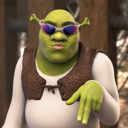

In [5]:
size = 128, 128
maziukas = normaliai.copy()
maziukas.thumbnail(size)
maziukas

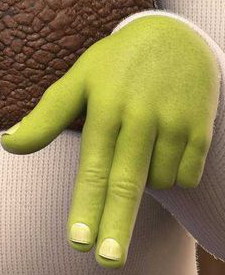

In [6]:
# box = 375, 450, 600, 725
rankele = normaliai.crop((375, 450, 600, 725), )
rankele

In [7]:
kairen = rankele.transpose(Image.Transpose.ROTATE_270)
kairen

AttributeError: module 'PIL.Image' has no attribute 'Transpose'

In [ ]:
kairen.size

(275, 225)

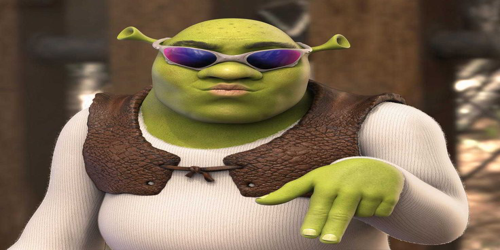

In [ ]:
storas = normaliai.resize((500, 250))
storas

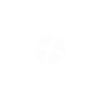

In [ ]:
zvaigzde = Image.open("img/imgbin_white-shining-stars.png")
zvaigzdute = zvaigzde.resize((100, 100))
zvaigzdute

In [ ]:
zvaigzdute.mode

'RGBA'

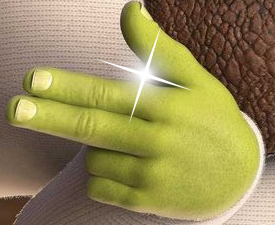

In [ ]:
# apsibreziam zvaigzdes pozicija ant kopijuojamo paveiksliuko
# 95x25 - kairys virsutinis kampas, 95+plotis ant 25+aukstis - desinys apatinis kampas
zv_loc = (95, 25, 95+zvaigzdute.size[0], 25+zvaigzdute.size[1])
# pasidarom (del visa ko) kopija is "originalo"
bling_kairen = kairen.copy()
# i kopija idedam zvaigzdute, pagal nurodytas koordinates. 3 parametras yra ALPHA mask (jo reikia tik permatomiems paveiksliukams)
bling_kairen.paste(zvaigzdute, zv_loc, zvaigzdute)
# rezultatas
bling_kairen

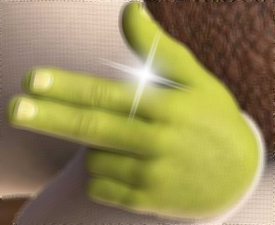

In [ ]:
# filtrai
from PIL import ImageFilter
su_efektu = bling_kairen.filter(ImageFilter.BLUR)
su_efektu

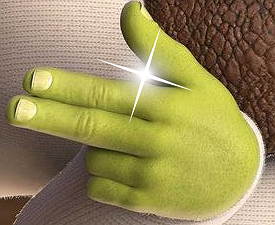

In [ ]:
su_efektu = bling_kairen.filter(ImageFilter.DETAIL)
su_efektu

In [ ]:
pixeldata = su_efektu.getdata()
print(su_efektu.size)
for pixel in enumerate(pixeldata):
    print(pixel)

In [ ]:
new_pixels = [(abs(new[0] - 30), abs(new[1] + 20), abs(new[2] - 30)) for new in pixeldata]
for pixel in enumerate(new_pixels):
    print(pixel)

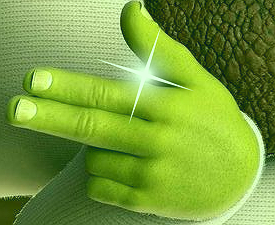

In [ ]:
zalia_rankele = su_efektu.copy()
zalia_rankele.putdata(new_pixels)
zalia_rankele

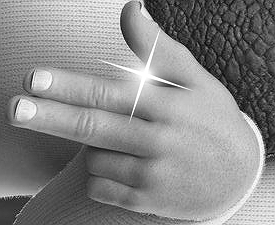

In [ ]:
bw_rankele = su_efektu.convert("L")
bw_rankele

In [ ]:
from PIL import ImageEnhance
ryskiai = ImageEnhance.Contrast(bling_kairen)
ryskiai.enhance(1.7)

NameError: name 'bling_kairen' is not defined

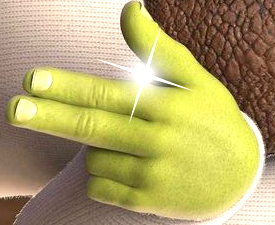

In [ ]:
sviesiai = ImageEnhance.Brightness(bling_kairen)
sviesiai.enhance(1.2)

(1280, 720)


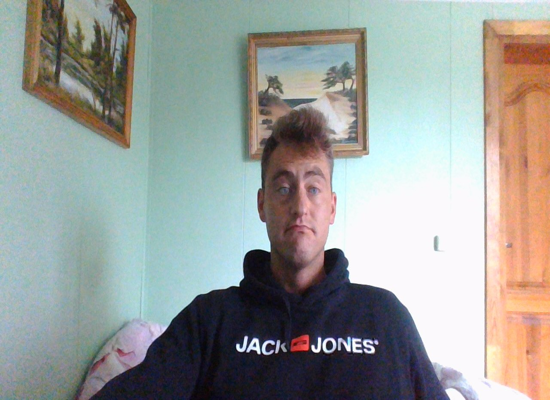

In [ ]:
mano = Image.open("img\\fotki.jpg")
print(mano.size)
size = 550, 400
mazesne = mano.resize(size)
mazesne

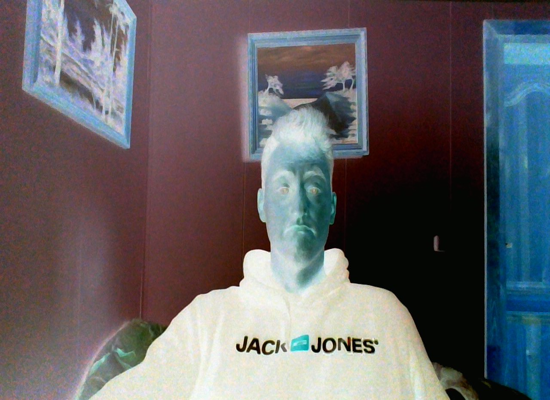

In [ ]:
from PIL import ImageOps, ImageFilter, ImageEnhance


keista = ImageOps.invert(mazesne)
keista

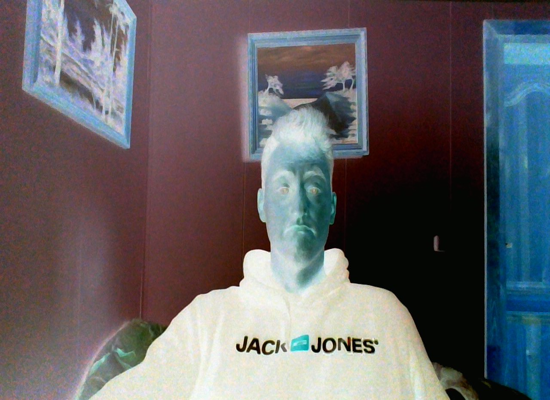

In [ ]:
pixeldata = mazesne.getdata()
new_pixels = [(abs(255 -new[0] ), abs(255 - new[1]), abs(255 - new[2])) for new in pixeldata]
nauji_pikseliai = mazesne.copy()
nauji_pikseliai.putdata(new_pixels)
nauji_pikseliai

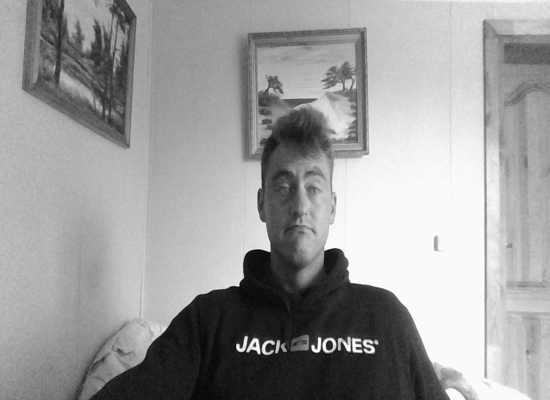

In [ ]:
juoda_balta = mazesne.convert("L")
juoda_balta

(450, 450)
RGB


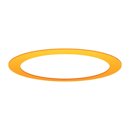

In [ ]:
zvaigzde = Image.open("img\\imgbin_white-shining-stars.png")
saint =  Image.open("img\\saint.png")
print(saint.size)
print(saint.mode)
saint_maz = saint.resize((130, 130))
saint_maz
# maza_zv = zvaigzde.resize((100,100))
# zv_loc = (240, 80, 240+maza_zv.size[0], 80+maza_zv.size[1])
# mazesne.paste(maza_zv, zv_loc, maza_zv)
# mazesne

In [ ]:

from PIL import Image
dangus = Image.open("img\\pont_au_mousson.jpg")
for x in range(0, dangus.size[0]):
    for y in range(0, dangus.size[1]):
        pixeliai = dangus.getpixel((x,y))
        red_pixel = 255 - pixeliai[0]
        green_pixel = 255 - pixeliai[1]
        blue_pixel = 255 - pixeliai[2]
        dangus.putpixel((x, y),(red_pixel, green_pixel, blue_pixel))
dangus

KeyboardInterrupt: 

(128, 128)


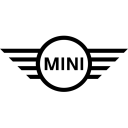

In [ ]:
logo = Image.open("img\\logopil.png")

print(logo.size)
logo

In [ ]:
small_logo = logo.crop((0,28,128,100))
print(small_logo.size)

(128, 72)


In [ ]:
from PIL import ImageEnhance
import os

bright = ImageEnhance.Brightness(small_logo)

def keiciam(img, koefbright, koefcontract, colorkontrast,sharpkontrast, save=False):
    brightinam = ImageEnhance.Brightness(img)
    kontrastas  = ImageEnhance.Contrast(brightinam.enhance(koefbright))
    spalvos = ImageEnhance.Color(kontrastas.enhance(koefcontract))
    sharpinam = ImageEnhance.Sharpness(spalvos.enhance(colorkontrast))
    if save:
        loc = os.path.splitext(img)[0]
        ext = os.path.splitext(img)[1]
        sharpinam.save(f'{loc}_modified{ext}')
    sharpinam.show()
    # return sharpinam.enhance(sharpkontrast)


keiciam(mazesne, 1.2, 1, 1.9, 3, True)
    

In [ ]:
from PIL import Image, ImageEnhance
import os

def enhance_image(img, contrast, color, sharpness, brightness, save=False):
    im = Image.open(img)
    enh = ImageEnhance.Contrast(im)
    im = enh.enhance(contrast)
    enh = ImageEnhance.Color(im)
    im = enh.enhance(color)
    enh = ImageEnhance.Brightness(im)
    im = enh.enhance(brightness)
    enh = ImageEnhance.Sharpness(im)
    im = enh.enhance(sharpness)
    if save:
        loc = os.path.splitext(img)[0]
        ext = os.path.splitext(img)[1]
        im.save(f'{loc}_modified{ext}')
    im.show()

enhance_image("img\\fotki.jpg", 2, 0, 5, 1, True)

In [ ]:
ziurim = os.path.splitext("img\\fotki.jpg")
print(ziurim)

('img\\fotki', '.jpg')


In [16]:
from PIL import Image
import os
# print(os.getcwd())

def gauti_fotkes(folderis):
    files = os.listdir(folderis)
    images = []
    os.mkdir("c:/codeacademy/ptu5_intro_kursas/img/atrinktos")
    for i in files:
        if i.endswith((".jpg", ".png")):
            j = Image.open(folderis+"/"+i)
            images.append(folderis+"/atrinktos/"+i)
            j.save(folderis+"/atrinktos/"+i)
        
    return images

gauti_fotkes("c:/codeacademy/ptu5_intro_kursas/img")


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'c:/codeacademy/ptu5_intro_kursas/img/atrinktos'

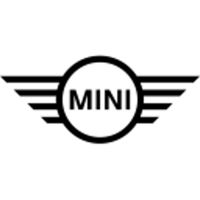

In [28]:
def pakeiciu_dydi(fotke, aukstis):
    img = Image.open(fotke)
    plotis = round(img.size[1]/(img.size[0]/aukstis))
    img = img.resize((aukstis, plotis))
    img.save("img\\logopil.png")
    return img

pakeiciu_dydi("img\\logopil.png", 200)




In [36]:
# Sukurkite programą, kuri, gavusi nuorodą į katalogą, praiteruos visus jame esančius failus,
 # išrinks nuotraukas, pakeis dydį pagal jūsų nurodytą aukštį išlaikant proporcijas, ir kiekvienos 
 # nuotraukos apatiniame dešiniajame kampe įdės logotipą, tą kurį išsisaugojote pirmoje užduotyje. 
 #Naudokite .resize, kadangi nuotrauką galbūt reikės padidinti, nebūtinai tik sumažinti.
def gaunam(folderis):
    files = os.listdir(folderis)
    images = []
    for i in files:
        if i.endswith((".jpg", ".png")):
            images.append(folderis+"/atrinktos/"+i)
    return images

      

def optimize_images(folderis, height):
    os.mkdir(f'{folderis}/optimized')
    logo = Image.open("img/logopil.png")
    pic_num = 0
    for i in gaunam(folderis):
        pic = Image.open(i)
        width = round(pic.size[1]/(pic.size[0]/height))
        pic = pic.resize((height, width))
        logo_location = (
            pic.size[0]-logo.size[0],
            pic.size[1]-logo.size[1], 
            pic.size[0], 
            pic.size[1])
        pic.paste(logo, logo_location, logo)
        pic_num += 1
        pic.save(f'{folderis}/optimized/picture_{pic_num}.png')

optimize_images("c:/codeacademy/ptu5_intro_kursas/img", 500 )





In [ ]:

def checkinam_dydzius(folderis):
    failai = os.listdir(folderis)

    for i , fotke in enumerate(failai):
        pic = Image.open(f"img/optimized/{failai[i]}")
        print(pic.size)

checkinam_dydzius("c:/codeacademy/ptu5_intro_kursas/img/optimized/")